In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## <center>Extract the data file</center>

In [3]:
zipFile = '/content/drive/MyDrive/ImageClassifier/dataImageClassifier.zip'
destination_directory = '/content/data'


In [4]:
import zipfile
import os

if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

with zipfile.ZipFile(zipFile, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

print(f"Extracted to {destination_directory}")


Extracted to /content/data


## <center>Parameters Definition</center>

In [5]:
img_height, img_width = 150, 150
batch_size = 16
epochs = 100
data_dir = 'data'

## <center>Data Preprocessing</center>

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2)  #20% validation data

In [7]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training')

Found 916 images belonging to 5 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation')

Found 227 images belonging to 5 classes.


### <center>Plotting Images</center>

In [9]:
def plot_images(generator, title, num_images=5):
    images, _ = next(generator)
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()


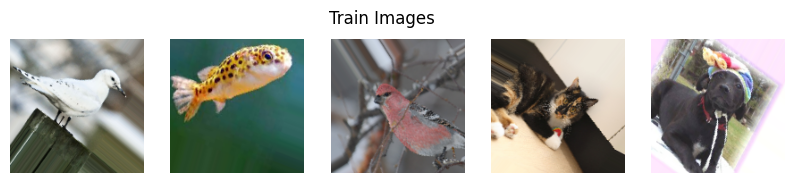

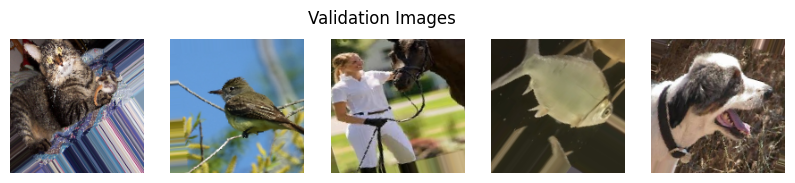

In [10]:
plot_images(train_generator, "Train Images ", 5)
plot_images(validation_generator, "Validation Images ", 5)

### <center>Class Names</center>

In [11]:
class_names = ['cats','dogs','fish','humans','birds']

## <center>Train the Model</center>

In [12]:
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(len(class_names), activation='softmax'),
])


In [13]:
cnn.compile(optimizer  =  Adam(learning_rate=0.00001),
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 128)               1

### <center>Early Stopping</center>

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [16]:
model = cnn.fit(train_generator, validation_data= validation_generator, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

Epoch 1/100
58/58 [==============================] - 15s 161ms/step - loss: 1.6150 - accuracy: 0.2140 - val_loss: 1.5883 - val_accuracy: 0.2291
Epoch 2/100
58/58 [==============================] - 9s 156ms/step - loss: 1.5960 - accuracy: 0.2522 - val_loss: 1.5764 - val_accuracy: 0.2599
Epoch 3/100
58/58 [==============================] - 9s 154ms/step - loss: 1.5868 - accuracy: 0.2522 - val_loss: 1.5578 - val_accuracy: 0.3084
Epoch 4/100
58/58 [==============================] - 9s 154ms/step - loss: 1.5765 - accuracy: 0.2707 - val_loss: 1.5423 - val_accuracy: 0.2996
Epoch 5/100
58/58 [==============================] - 9s 154ms/step - loss: 1.5617 - accuracy: 0.2849 - val_loss: 1.5276 - val_accuracy: 0.3921
Epoch 6/100
58/58 [==============================] - 9s 155ms/step - loss: 1.5423 - accuracy: 0.2991 - val_loss: 1.5179 - val_accuracy: 0.3084
Epoch 7/100
58/58 [==============================] - 9s 153ms/step - loss: 1.5381 - accuracy: 0.3100 - val_loss: 1.4975 - val_accuracy: 0.400

In [17]:
cnn.save('cnn_local_data.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
loaded_model = tf.keras.models.load_model('cnn_local_data.h5')

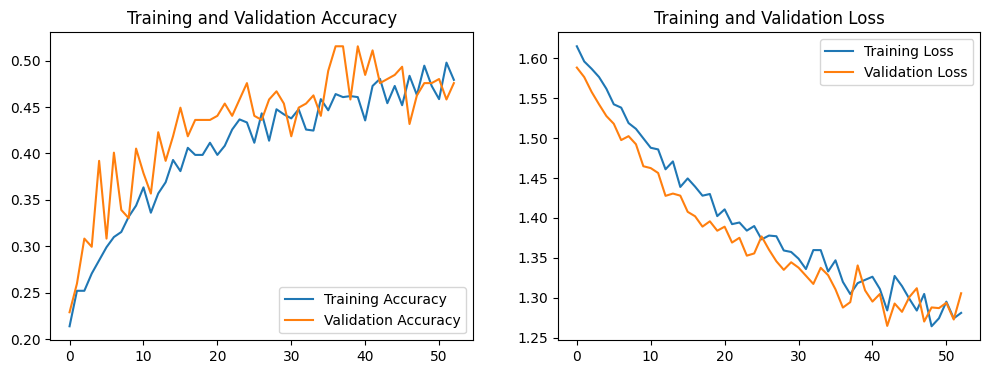

In [21]:

history = model.history


acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs_range = range(len(acc))


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
